In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import numpy as np
import json
import pandas as pd
import numpy as np
import time
import string
from matplotlib import pyplot as plt
import tensorflow as tf
import sys
sys.path.append('../')
from brain2brain import utils
from brain2brain import generators
%matplotlib inline

# TF
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model

# TCN
from brain2brain.tcn import TCN
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten

In [3]:
# Read saved paths for training.
saved_paths = utils.get_file_paths("../brain2brain/train_676_norm_files_projects.txt")

In [4]:
# Split the train files into a training and validation set.
train, val = utils.split_file_paths(saved_paths, 0.8)

In [5]:
# The time we look back.
lookback_window = 256 # .5 seconds
# Length of sequence predicted.
length_pred = 1 # 1 timestep
# Delay between lookback and length.
delay_pred = 0 # No delay.
# Sampling of electrodes.
samples_per_second = 1 # Samples Per Second
timesteps_per_sample = int(lookback_window // samples_per_second)
# Electrodes
electrode_selection = [1]
electrode_count = len(electrode_selection)
batch_size = 1024

In [6]:
# Training Generator
train_generator = generators.FGenerator(file_paths = train,
                                        lookback=lookback_window, length = length_pred, delay = delay_pred,
                                        batch_size = batch_size, sample_period = samples_per_second,
                                        electrodes= electrode_selection, shuffle = True, debug=False,
                                        ratio=1.0)

In [7]:
# Validation Generator
val_generator = generators.FGenerator(file_paths = val,
                                      lookback=lookback_window, length = length_pred, delay = delay_pred,
                                      batch_size = batch_size, sample_period = samples_per_second,
                                      electrodes= electrode_selection, shuffle = False, debug=False,
                                      ratio=1.0)

In [21]:
train_steps=len(train_generator)

In [22]:

val_steps=len(val_generator)

# TCN Test 1

In [37]:
targets = []
for i in range(len(val_generator)):
    x, y = val_generator[i]
    for target in y:
        targets.append(target[0][0])

In [23]:
# Open TCN Test History
model = load_model("/home/tmarcu/brain2brain/experiments/experiment_logs/experiment1_model.h5",
                   custom_objects={"TCN": TCN})

(None, 256, 1)


51/51 [==============================] - 76s 1s/step


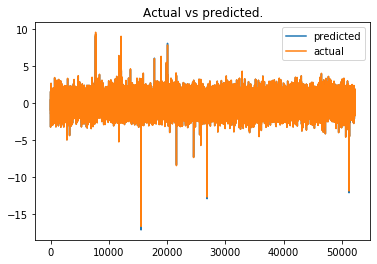

In [24]:
p = model.predict_generator(val_generator, steps=val_steps,
                                callbacks=None, max_queue_size=10, workers=1,
                                use_multiprocessing=True, verbose=1)


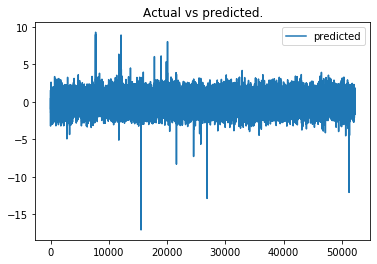

In [27]:
plt.figure()
plt.plot(p)
# plt.plot(targets)
plt.title('Actual vs predicted.')
plt.legend(['predicted', 'actual'])

In [25]:
with open('experiment_logs/experiment1_model_history.json') as json_file:
    history = json.load(json_file)

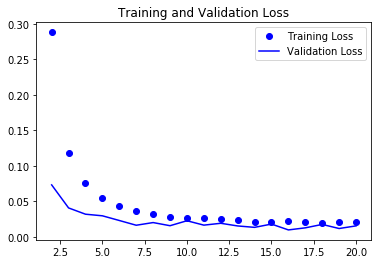

In [26]:
# Plot Loss Curves for Validation and Training
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs[1:], loss[1:], 'bo', label="Training Loss")
plt.plot(epochs[1:], val_loss[1:], 'b', label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# GRU Test (No Dropout)

In [30]:
# Open GRU Test History
model = load_model("/home/tmarcu/brain2brain/experiments/experiment_logs/gru_experiment_1_model.h5",
                   custom_objects={"TCN": TCN})

51/51 [==============================] - 53s 1s/step


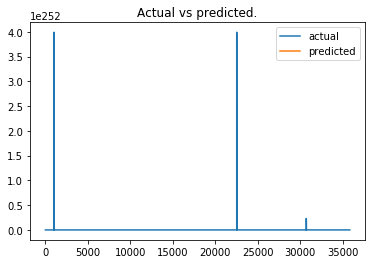

In [33]:
p = model.predict_generator(val_generator, steps=val_steps,
                                callbacks=None, max_queue_size=10, workers=1,
                                use_multiprocessing=True, verbose=1)


In [40]:
p

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

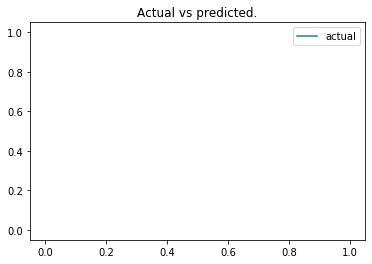

In [39]:
plt.figure()
# plt.plot(targets)
plt.plot(p)
plt.title('Actual vs predicted.')
plt.legend(['actual', 'predicted'])

In [35]:
with open('experiment_logs/gru_experiment_1_history.json') as json_file:
    history = json.load(json_file)

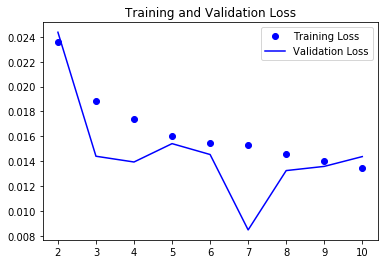

In [36]:
# Plot Loss Curves for Validation and Training
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs[1:], loss[1:], 'bo', label="Training Loss")
plt.plot(epochs[1:], val_loss[1:], 'b', label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# GRU Test (With Dropout)

In [41]:
# Open GRU Test History
model = load_model("/home/tmarcu/brain2brain/experiments/experiment_logs/gru_experiment_2_model.h5",
                   custom_objects={"TCN": TCN})

In [42]:
p = model.predict_generator(val_generator, steps=val_steps,
                                callbacks=None, max_queue_size=10, workers=1,
                                use_multiprocessing=True, verbose=1)


51/51 [==============================] - 55s 1s/step


In [43]:
p

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

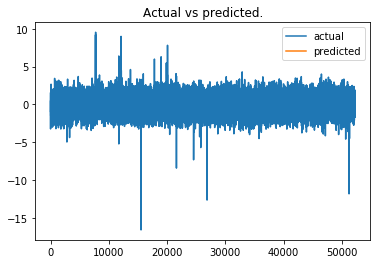

In [44]:
plt.figure()
plt.plot(targets)
plt.plot(p)
plt.title('Actual vs predicted.')
plt.legend(['actual', 'predicted'])

In [45]:
with open('experiment_logs/gru_experiment_2_history.json') as json_file:
    history = json.load(json_file)

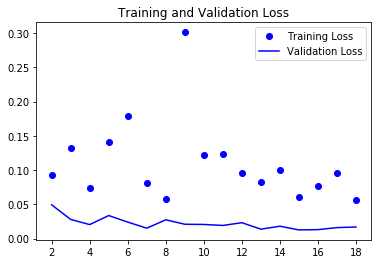

In [46]:
# Plot Loss Curves for Validation and Training
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs[1:], loss[1:], 'bo', label="Training Loss")
plt.plot(epochs[1:], val_loss[1:], 'b', label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()